In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score , recall_score , f1_score , confusion_matrix
from sklearn.metrics import roc_curve , auc
import matplotlib.pyplot as plt
import seaborn as snb

In [2]:
# Load the dataset
data = pd.read_csv("inf.csv")
data = data.drop(['Unnamed: 0'],axis = 1)

In [3]:
# Split the data into features and target variable
X = data.drop('Pathogen Test Result', axis=1)
y = data['Pathogen Test Result']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Create a random forest classifier object with 100 trees
rf = RandomForestClassifier(n_estimators=100)

In [6]:
# Train the model on the training set
rf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
# Use the trained model to make predictions on the testing set
y_pred = rf.predict(X_test)
y_pred2 = rf.predict(X_train)


In [8]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2),'%')

Accuracy: 87.99 %


In [9]:
# precision for trainig and testing
print('for testing  : ' , round(precision_score(y_test , y_pred)*100,2),'%')
print('for training : ' , round(precision_score(y_train , y_pred2)*100,2),'%')

for testing  :  90.7 %
for training :  95.74 %


In [10]:
# Recall for trainig and testing
print('for testing  : ' , round(recall_score(y_test , y_pred)*100,2),'%')
print('for training : ' , round(recall_score(y_train , y_pred2)*100,2),'%')

for testing  :  86.88 %
for training :  90.2 %


In [11]:
# f1_score for trainig and testing
print('for testing  : ' , round(f1_score(y_test , y_pred)*100,2),'%')
print('for training : ' , round(f1_score(y_train , y_pred2)*100,2),'%')

for testing  :  88.75 %
for training :  92.89 %


array([[1504,  180],
       [ 265, 1755]], dtype=int64)

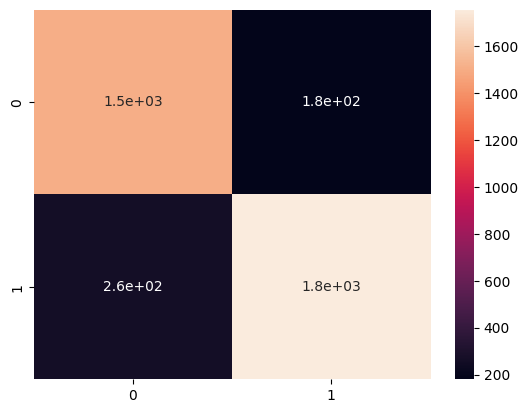

In [12]:
cm = confusion_matrix(y_test,y_pred)
snb.heatmap(cm, annot =True)
cm

In [13]:
# for sensitivity and specificity
tn, fp, fn, tp = cm.ravel()

In [14]:
specificity = tn / (tn+fp)
print('specificity for data is : ',round(specificity*100,2),'%')

specificity for data is :  89.31 %


In [15]:
sensitivity = tp / (tp+fn)
print('sensitivity for data is : ',round(sensitivity*100,2),'%')

sensitivity for data is :  86.88 %


In [16]:
#ROC and AUC
fpr, tpr, threshold = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

In [17]:
print('Area under curve : ',round(roc_auc*100,2),'%')

Area under curve :  88.1 %


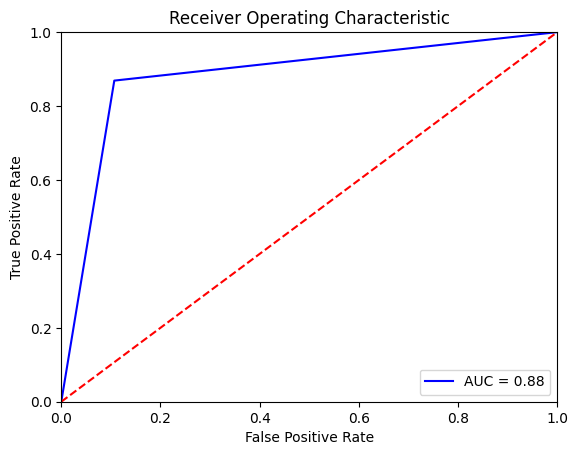

In [18]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
cm

array([[1504,  180],
       [ 265, 1755]], dtype=int64)